<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/al_co_re_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기존 내용이 존재하지 않는다는 가정 하에, 데이터 셋을 불러오는 과정
* 데이터 분석에서 가장 기본적인 과정 -> 익숙해지기

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Study/Jupyter'

df = pd.read_csv(path + '/' + 'train.csv')  # 주피터 노트북에서는 자동 완성 기능(Tab)을 지원하지만 시험 환경에 따라 지원하지 않을 수 있음, 자주 활용되는 메서드는 암기
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##### column 선택하기
* df[컬럼이름] -> 해당 컬럼 하나 선택, 딕셔너리와 같은 문법.
* 컬럼 여러 개를 선택하는 것은 대괄호 안에 컬럼 이름들을 리스트화하여 명시.

In [ ]:
interested = ['datetime', 'season', 'holiday', 'workingday']  # 따옴표를 사용하지 않으면 같은 이름의 변수와 혼동됨.
# 컬럼의 개수가 많아 한 화면에 표기하기 어렵거나,
# 특정 컬럼 및 몇 개만 따로 분석 또는 계산에 이용하고자 할 때,
# 다루는 데이터 프레임의 row / column 개수가 많을 때,
# 그리고 용량이 클 때, 처리속도를 빠르게 하기 위함(용량이 작아짐)
df[interested].head()

,datetime,season,holiday,workingday
0,2011-01-01 00:00:00,1,0,0
1,2011-01-01 01:00:00,1,0,0
2,2011-01-01 02:00:00,1,0,0
3,2011-01-01 03:00:00,1,0,0
4,2011-01-01 04:00:00,1,0,0


In [ ]:
# 컬럼의 개수가 많을 때, 컬럼 이름들이 무엇무엇이 있나 확인하는 방법
# .columns 는 해당 데이터 프레임을 구성하는 컬럼의 이름 모음집.
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# 만약 각 컬럼에 대해 컬럼별 반복 처리작업 진행시 for 문 이용 가능.
for col in df.columns :  # .columns 의 결과가 리스트이므로
    print(col)

datetime
season
holiday
workingday
weather
temp
atemp
humidity
windspeed
casual
registered
count


#####  컬럼별 기초통계량 추출
* 개수, 평균, 표준편차, 최소 / 최대, 분위수, 중간값
* df.describe() 이용.

In [ ]:
df.describe()
# 수치형 자료(특히, 컬럼)에만 적용 가능.
# 크기의 성질이 있는 숫자끼리만 더할 수 있고
# 더하기가 되어야 평균을 구하여 표준편차를 구할 수 있음.
# 크기의 성질이 있어야 대소비교 가능 -> 크기 순 정렬 또한 가능.

# .head()의 결과 숫자 컬럼인 줄 알았는데 describe() 에 안 나왔다?
# 4주차 수업 시간에 다루는 데이터 셋에 해당 사례 존재

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### 정렬(sorting) - row 의 순서를 바꿈
* 대상(컬럼)을 정해 오름/내림차순으로 정렬한다.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.sort_values(by='temp', ascending=False)  # Shift + Tab -> 메서드의 인자(parameter) 알 수 있음, 디폴트 값은 오름차순
# by='temp' -> temp 컬럼에 대하여 정렬
# ascending=False -> 내림차순 정렬
# 자주 쓰는 메서드 및 함수는 물론, 내부 인자도 익숙해져야 함.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8311,2012-07-07 16:00:00,3,0,0,1,41.00,43.180,19,11.0014,102,192,294
8309,2012-07-07 14:00:00,3,0,0,2,39.36,43.180,30,8.9981,105,203,308
8307,2012-07-07 12:00:00,3,0,0,1,39.36,43.180,31,23.9994,124,218,342
8308,2012-07-07 13:00:00,3,0,0,2,39.36,43.180,31,16.9979,116,244,360
8312,2012-07-07 17:00:00,3,0,0,1,39.36,42.425,26,8.9981,103,176,279
...,...,...,...,...,...,...,...,...,...,...,...,...
5501,2012-01-04 08:00:00,1,0,1,1,0.82,3.030,44,8.9981,5,310,315
5498,2012-01-04 05:00:00,1,0,1,1,0.82,2.275,41,12.9980,0,14,14
5497,2012-01-04 04:00:00,1,0,1,1,0.82,2.275,41,12.9980,0,2,2
5496,2012-01-04 03:00:00,1,0,1,1,0.82,0.760,34,19.0012,0,1,1


##### 연습. describe, transpose, sort_values, 불리언 인덱싱, .columns 이용하기
* df 데이터 프레임에 대하여 컬럼별 표준편차 크기 순으로 오름차순 정렬하기  
(컬럼별 표준편차는 describe, 정렬은 sort_values)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
df.describe().T.sort_values(by='std')  # 컬럼을 기준으로 정렬 가능하기 때문에 transpose 활용

,count,mean,std,min,25%,50%,75%,max
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


* df 데이터 프레임에 대하여 표준편차가 0.001 초과인 컬럼들 나열하기.  
  (표준편차는 describe, 0.001 초과 기준은 불리언 인덱싱, 컬럼 나열은 .columns)

In [ ]:
df.describe().T.loc[df.describe().T['std'] > 0.001].T.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# 1. 내 풀이: 열을 나열하는 코드를 먼저 작성 후, 조건 작성
df.describe().columns[df.describe().T['std'] > 0.001]

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# 2. 선생님 풀이: 단계를 나누어 / 조건 설정을 먼저 작성 후, 열 나열
t_desc = df.describe().T
t_desc.loc[t_desc['std'] > 0.001].T.columns  # 본래 컬럼이었던 것을 전치하여 행으로 변경했으므로 다시 전치
# .loc 의 특성 상, 해당 조건을 만족하는 row 들을 고른 후, 전치하여(즉, column이 됨) 해당 열 나열

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 컬럼에 대해 수식 적용하기
##### 꼭 수학적인 것만 수식이 아님.
* apply 메서드와 lambda 함수를 이용.

In [ ]:
df['temp'] / 10

0        0.984
1        0.902
2        0.902
3        0.984
4        0.984
         ...  
10881    1.558
10882    1.476
10883    1.394
10884    1.394
10885    1.312
Name: temp, Length: 10886, dtype: float64

In [ ]:
df['temp'].apply(lambda x : x / 10)
# .apply 메서드를 이용하여 컬럼 내 값 하나하나에 대해
# lambda x : x / 10 수식을 일괄 적용.(R의 apply(df['temp'], 2, ) 함수와 동일한 기능.)
# df['temp'] / 10 과 동일함.

0        0.984
1        0.902
2        0.902
3        0.984
4        0.984
         ...  
10881    1.558
10882    1.476
10883    1.394
10884    1.394
10885    1.312
Name: temp, Length: 10886, dtype: float64

In [ ]:
sample = '2011-01-01 00:00:00'
sample.split(' ')
# split 메서드 -> 해당 문자열에 대하여 공백(디폴트)을 기준으로 분할하여 결과를 리스트화.
# 리스트에서 0번째는 '2011-01-01', 1번째는 '00:00:00'
# 인덱싱으로 0번째 선택하면 년-월-일 정보,
# 인덱싱으로 1번째 선택하면 시-분-초 정보 선택 가능.

['2011-01-01', '00:00:00']

In [ ]:
sample = '2011-01-01 00:00:00'
int(sample.split(' ')[0].split("-")[0])  # sample 변수의 문자열에서 연도 정보 추출

2011

In [ ]:
lambda x : int(x.split(' ')[0].split("-")[0])  # 위의 sample 을 변수 x로

<function __main__.<lambda>>

In [ ]:
df['year'] = df['datetime'].apply(lambda x : int(x.split(' ')[0].split("-")[0]))
# 만든 lambda 수식을 이용하여 'datetime' 컬럼으로부터 연도 추출하여 새로운 컬럼에 할당.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


##### 월, 일, 시 정보도 lambda 이용하여 새로운 컬럼으로 할당
* month, day, hour 컬럼 만들어 할당.

In [ ]:
df['month'] = df['datetime'].apply(lambda x : int(x.split(' ')[0].split("-")[1]))
df['day'] = df['datetime'].apply(lambda x : int(x.split(' ')[0].split("-")[2]))
# df['hour'] = df['datetime'].apply(lambda x : int(x.split(' ')[1].split(":")[0]))
df['hour'] = df['datetime'].apply(lambda x : int(x.split(" ")[1][:2]))  # 슬라이싱도 당연히 가능.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 불리언 인덱싱 더 알아보기
##### 조건이 여러 개라면?
* 여러 개의 조건을 동시에 만족하는 row 특정하기.

In [ ]:
(df['year'] == 2011) & (df['month'] == 1)
# & 는 '그리고' 라는 의미입니다 -> 왼쪽과 오른쪽 조건 둘 다 만족할 때, True.
# | 는 '또는' 이라는 의미입니다 -> 왼쪽과 오른쪽 조건 둘 중 하나라도 만족할 때, True.

0         True
1         True
2         True
3         True
4         True
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [ ]:
df.loc[(df['year'] == 2011) & (df['month'] == 1)]
# 대괄호 안에 불리언 조건을 연결해 이어붙여도 기존과 동일하게
# 컬럼의 값을 기준으로 인덱싱(필터링)이 가능합니다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,2011,1,19,19
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,2011,1,19,20
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011,1,19,21
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011,1,19,22


### 데이터 소개
##### Maryland 의 Washington D.C 에서 수집한 데이터. 공유자전거 스타트업이 모은 것.
> 출처 : https://www.capitalbikeshare.com/system-data
* 2011 ~ 2012년도까지 2년치, 시간대별(1시간 간격)로   
 1. 날짜정보(datetime, season, holiday, workingday)
 2. 기상정보(weather, temp, atemp, humidity, windspeed)
 3. 고객 이용정보(casual, registered, count)  
를 나타낸 것.
* {날짜}
 * datetime : 년-월-일 시:분:초 날짜/시간정보입니다.
 * season : 계절정보입니다.
 * holiday : 휴일정보입니다.
 * workingday : 근로정보입니다.
* {기상}
 * weather : 날씨가 험악한 정도(숫자가 커질수록 가혹함..ㅠ)
 * temp : 온도
 * atemp : 체감온도(feels like temperature)
 * humidity : (상대)습도
 * windspeed : 풍속(Km/h)
* {고객}
 * casual : 비등록회원 이용객 수
 * registered : 등록회원 이용객 수
 * count : casual + registered 해당시간 총 이용객 수

현재 수업시간에 사용하는 데이터 셋은 위의 데이터를 어느 정도 처리하여 깔끔하게 만든 자료!

In [ ]:
interested = ['datetime', 'casual', 'registered', 'count']
# 시간대에 따른 고객 이용정보만 따로 선택.
df[interested].head()

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1


### 계절(season)별 총 이용객 수(count) 평균
##### 불리언 인덱싱, 컬럼 선택, numpy의 mean 기능 이용
* 특정 조건을 만족하는 row에 대해 한 컬럼을 선택하여 평균 수식 적용

In [ ]:
import numpy as np
np.unique(df['season'])
# np.unique 는 대상 묶음에서 서로 다른 경우의 수 알보는 기능.
# df['season']이 대상이므로 season 컬럼에 대해 서로 다른 경우의 수 파악.

array([1, 2, 3, 4])

In [ ]:
np.mean(df.loc[df['season'] == 1]['count'])
# df['season'] == 1 조건을 True 로 만족하는 row 들에 대해
# ['count'] 컬럼을 선택하여 np.mean 으로 평균 구함.
###df.loc 으로 조건에 맞는 row들을 선택했으므로 데이터프레임과 동일하게 col만 지정하면 됨###

116.34326135517499

In [ ]:
sc = [{'season' : 1, 'count' : np.mean(df.loc[df['season'] == 1]['count'])},
 {'season' : 2, 'count' : np.mean(df.loc[df['season'] == 2]['count'])},
 {'season' : 3, 'count' : np.mean(df.loc[df['season'] == 3]['count'])},
 {'season' : 4, 'count' : np.mean(df.loc[df['season'] == 4]['count'])}]
sc  # 1. 직접 추가

[{'count': 116.34326135517499, 'season': 1},
 {'count': 215.25137211855105, 'season': 2},
 {'count': 234.417124039517, 'season': 3},
 {'count': 198.98829553767374, 'season': 4}]

In [ ]:
season_counts = []  # 2. 빈 리스트 생성 후, season 별 count 평균을 딕셔너리로 만들어
# season 별로 한 번씩 리스트에 append 하여 데이터 추가.
season_counts.append({'season' : 1, 'count' : np.mean(df.loc[df['season'] == 1]['count'])})
season_counts.append({'season' : 2, 'count' : np.mean(df.loc[df['season'] == 2]['count'])})
season_counts.append({'season' : 3, 'count' : np.mean(df.loc[df['season'] == 3]['count'])})
season_counts.append({'season' : 4, 'count' : np.mean(df.loc[df['season'] == 4]['count'])})
season_counts

[{'count': 116.34326135517499, 'season': 1},
 {'count': 215.25137211855105, 'season': 2},
 {'count': 234.417124039517, 'season': 3},
 {'count': 198.98829553767374, 'season': 4}]

In [ ]:
pd.DataFrame(season_counts)  # 판다스 활용

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


In [ ]:
# for 반복문 활용
scs = []
for i in np.unique(df['season']) :
    scs.append({'season' : i, 'count' : np.mean(df.loc[df['season'] == i]['count'])})
scs

[{'count': 116.34326135517499, 'season': 1},
 {'count': 215.25137211855105, 'season': 2},
 {'count': 234.417124039517, 'season': 3},
 {'count': 198.98829553767374, 'season': 4}]

### 그룹 합산 : groupby -> aggregation
##### groupby = 특정 컬럼의 경우의 수에 따라 그룹으로! / aggregation = 컬럼 안의 값들을 합쳐서 계산(한꺼번에)  

* 특정 컬럼을 정해 해당 컬럼의 경우의 수로 그룹그룹 묶고
* 그룹 안에서 한 그룹당 특정 컬럼을 정해 그 컬럼 안의 값들을 합산.  

지금은 컬럼 정해 경우의 수 나눔 = season  
합산의 대상이 되는 컬럼 = count

In [ ]:
season_count = df.groupby('season').agg({'count' : np.mean})  # 연산 결과가 이미 데이터프레임이므로 pd.DataFrame 불필요.
# groupby('season') = season 컬럼의 경우의 수 기준으로 그룹 짓기(row들)
# .agg = 그룹별로 합산 하겠음(aggregation 준말)
# {'count' : np.mean} = 수식 적용할 컬럼을 딕셔너리의 키로, 수식을 값으로 설정
# count 컬럼에 대해 np.mean 함수 적용하겠다는 의미.

# 주의사항 : np.mean 함수 뒤에 소괄호 ()가 없음?
# 함수 뒤에 소괄호가 붙으면 실행하겠다는 의미. 지금은 실행이 아니라
# 함수의 기능만 재료로 집어넣는 것.
season_count

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [ ]:
season_count.reset_index()
# .reset_index() 이용하여 인덱스로 잡혀있는 season 을 컬럼으로 올릴 수 있음.
# season이 인덱스 취급을 받다가 0부터 다시 reset을 거침으로써 컬럼으로 생성됨.

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


##### multi-index aggregation
* 경우의 수 컬럼을 여러 개 이용하여 경우의 수를 세분화해 합산

In [ ]:
interested = ['year', 'season']
year_season = df.groupby(interested).agg({'count' : np.mean})
# year 컬럼의 경우의 수 2개, season 컬럼의 경우의 수 4개
# 2 * 4 = 8 개의 경우의 수에 대하여 row 를 그룹화하고 합산.
year_season.reset_index()

,year,season,count
0,2011,1,71.905518
1,2011,2,160.940746
2,2011,3,186.994872
3,2011,4,154.787125
4,2012,1,159.476889
5,2012,2,269.601757
6,2012,3,281.735380
7,2012,4,243.189466


##### 날짜 다루는 판다스 도구: pd.to_datetime
* 판다스에서 제공하는 날짜를 해석하는 pd.to_datetime 이용
* 기존 슬라이싱, 문자열 메서드 등 이용하는 것 대비 더 다양한 정보 추출 가능

In [ ]:
sample = '2011-01-01 00:00:00'
parsed = pd.to_datetime(sample)
parsed
# 문자열이 아니라, 날짜로 인식 -> 요일 또한 추출 가능.

Timestamp('2011-01-01 00:00:00')

In [ ]:
parsed.dayofweek
# dayofweek 는 요일입니다.
#  0  1  2  3  4  5  6
#  월 화 수 목 금 토 일
# '2011-01-01 00:00:00' 은 dayofweek 가 5이므로 토요일.

5

In [ ]:
pd.to_datetime(sample).dayofweek

5

In [ ]:
lambda x : pd.to_datetime(x).dayofweek  # 전날 수업에서 말했던 lambda 의 장점: 계획 구상 -> 이후 다른 곳에 적용

<function __main__.<lambda>>

In [ ]:
df['dayofweek'] = df['datetime'].apply(lambda x : pd.to_datetime(x).dayofweek)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [ ]:
df.to_csv('processed.csv', index=False)  # 원본 데이터 train.csv 에 year, month, day, hour, dayofweek 컬럼을 추가한 새로운 데이터 셋

### 시각화(Visualization)
##### matplotlib, pandas, seaborn, ... 등 다양한 도구로 시각화 가능
* 데이터를 눈에 잘 보이도록 그림으로 표현하는 것을 시각화라 합니다.
* 시각적인 정보를 받아들이는 눈을 이용해 데이터를 해석하기 위함.
* 대상이 누구인지 명확하게 인지하고 있어야 함(모른다면 가능한 다수)
* 좋은 시각화 자료는 '직관성 + 시인성'이 좋아야 함.
* 일반적인 대상군(audience) : stakeholder(이해관계자), sponsor, technical audience(CTO, 팀장 등 전문가 / 기술적인 면 중요함) 

In [ ]:
import pandas as pd

path = '/content/drive/My Drive/Study/Jupyter'
df = pd.read_csv(path + '/' + 'processed.csv')

### matplotlib
##### 1세대 파이썬 그래프 도구
* math + plot + library
* 수학 + 그림 + 도구모음

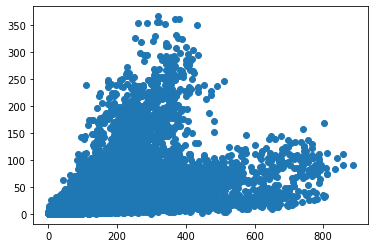

In [ ]:
import matplotlib.pyplot as plt
# matplotlib 도구 안에서 pyplot 을 불러와 plt 축약어로 사용
%matplotlib inline
# inline command 라는 것이고, 주피터 노트북 파일에
# matplotlib 그래프 그림을 포함시키겠다는 의미.
plt.scatter(data=df, x='registered', y='casual')  # scatter plot, 산점도 = 산포된 점의 그림
# data=df -> 어떤 데이터를 이용해 그래프를 그리는가?
# x='registered', y='casual' -> 점을 찍을 때 x, y 혹은 어느 컬럼 기준인가?
# plt.그래프종류

##### pandas 로 그리기
* matplotlib 과 기본적으로 동일한 형식
* 그 이유는 pandas에서 그림을 그릴 때, matplotlib 을 내부적으로 이용하기 때문

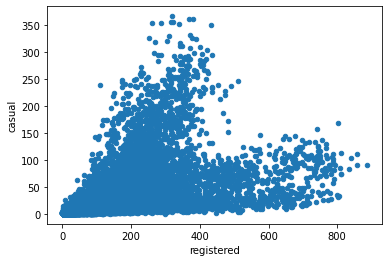

In [ ]:
df.plot.scatter(x='registered', y='casual')
# df.plot -> df 데이터 프레임(판다스 데이터 프레임)에 대하여 그래프를 그린다
# .scatter -> 산점도 그래프를 그린다
# x='registered', y='casual' -> x, y축 설정.

##### seaborn
* 수업에서 메인으로 사용할 그래프 그리는 도구
* 1세대 도구인 matplotlib 대비 시각적으로 조금 더 발전한 형태.
* hue 기능 지원으로 시각화에 사용할 변수를 쉽게 추가 가능.

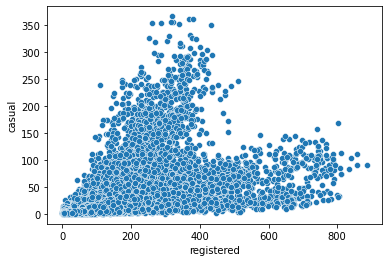

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='registered', y='casual')  # 필요한 정보 입력 방법은 matplotlib 과 동일함.
# 위의 두 그래프와 비교 시, 테두리 존재.
# 따라서 데이터가 어느 정도로 밀집되었는지 약간이나마 파악 가능.

##### seaborn 을 강력하게 만들어주는 hue 기능
* (scatter)한 row에 대한 정보가 2개(축 2개를 만들기 위함) 있고, 이를 이용해 위치 특정.
* 색상이라는 특징을 하나 더 추가하여 정보(차원)를 더 반영함 -> 주의. 3차원은 아님

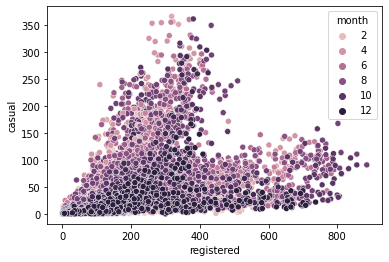

In [ ]:
sns.scatterplot(data=df, x='registered', y='casual', hue='month')

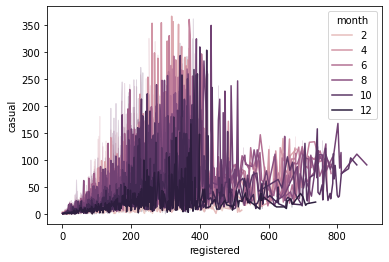

In [ ]:
sns.lineplot(data=df, x='registered', y='casual', hue='month')

> 과제.  scatterplot, lineplot을 이용하여 이 데이터 셋을 가장 잘 표현하는 그림을 만들기.

##### 구체화
* 그림을 해석하여 문장을 도출해 낼 수 있어야 함.
* 파라미터 hue=' ' 에 어떤 컬럼(정보)을 추가해야, 산점도에서 나타난 2개의 큰 (대각선) 방향성을 비교적 확실하게 보여줄 수 있는가?

##### 힌트
* 처음에는 hue 넣지 말고 x, y 만 바꿔서 찾기.
* 이거다?! 싶으면 hue 바꿔서 의미 파악.
* 자전거 이용량 정보임을 고려한다면 x, y 선정 시 용이.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

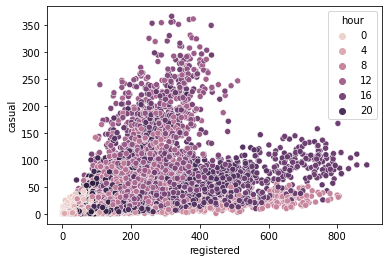

In [ ]:
sns.scatterplot(data=df, x='registered', y='casual', hue='hour')

In [ ]:
sns.lineplot(data=df, x='registered', y='casual', hue='hour')